In [37]:
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn as sk
import statsmodels.api as sm
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse, r2_score, mean_absolute_error
from scipy import stats
from scipy.stats import boxcox
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
pd.set_option('display.max_columns', None)

In [38]:
data = pd.read_csv('C:/Users/ASUS/Desktop/Hector/mini_project#1/data_mid_bootcamp_project_FIFA_MoneyBall/fifa21_male2.csv')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1164\571423781.py:1: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:/Users/ASUS/Desktop/Hector/mini_project#1/data_mid_bootcamp_project_FIFA_MoneyBall/fifa21_male2.csv')


In [39]:
data.columns=data.columns.str.lower().str.replace(' ', '_')
data.isna().sum()

id             0
name           0
age            0
ova            0
nationality    0
              ..
cb             0
rcb            0
rb             0
gk             0
gender         0
Length: 107, dtype: int64

In [40]:
data = data.drop(['name', 'nationality', 'club', 'player_photo', 'club_logo', 
                               'flag_photo', 'team_&_contract', 'joined', 'loan_date_end', 'value', 'wage', 'release_clause',
       'contract', 'gender'], axis = 1)

In [41]:
data.isna().sum()

id     0
age    0
ova    0
bov    0
bp     0
      ..
lcb    0
cb     0
rcb    0
rb     0
gk     0
Length: 93, dtype: int64

In [42]:
data = data.dropna()

In [43]:
data['position'] = data['position'].replace('ACB', 'CB')

In [44]:
#se eliminan aquellos jugadores con más de 3 posiciones
data = data[data['position'].str.len() <= 10]

In [45]:
noceros= data
noceros = noceros[noceros['growth'] > 0]
x = noceros['growth'].mean()
data['growth']= data['growth'].replace(0, x)

In [46]:
data = data.sort_values('position')

In [47]:
data= data.reset_index(drop=True)

In [49]:
df = data[['bov', 'position', 'bp', 'age', 'growth', 'attacking', 'skill', 'agility', 
            'power', 'mentality', 'defending', 'goalkeeping', 'total_stats']]

In [50]:
categorical= data.select_dtypes(include='object')

In [51]:
visual_df = df.drop(['position', 'age', 'growth', 'bp'], axis = 1)

categorical= data.select_dtypes(include='object')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1164\2094687856.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(visual_df[i])


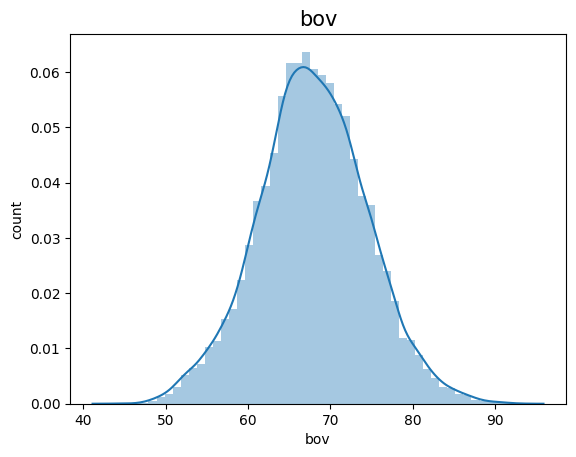

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1164\2094687856.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(visual_df[i])


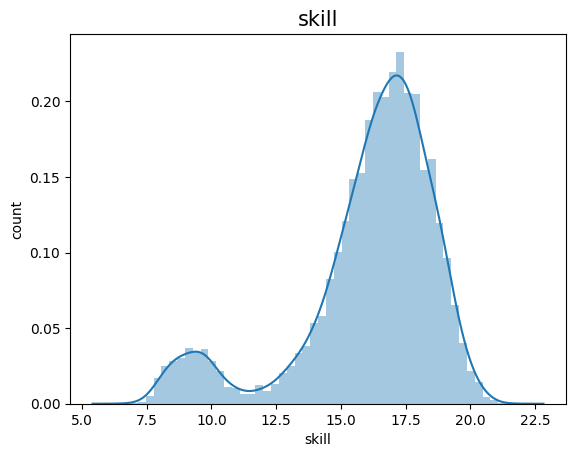

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1164\2094687856.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(visual_df[i])


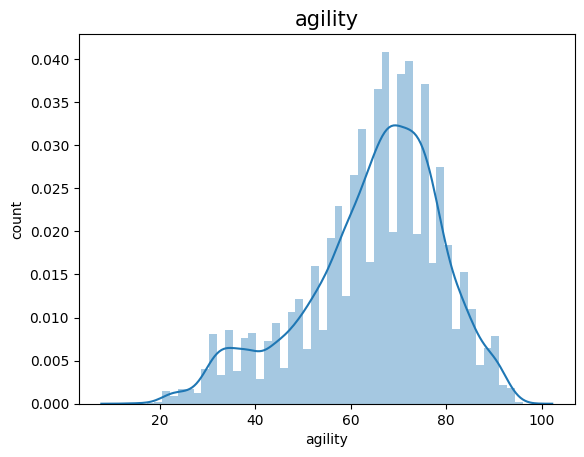

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1164\2094687856.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(visual_df[i])


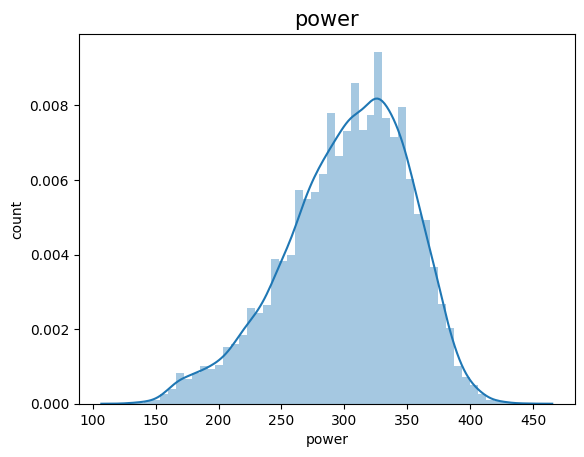

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1164\2094687856.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(visual_df[i])


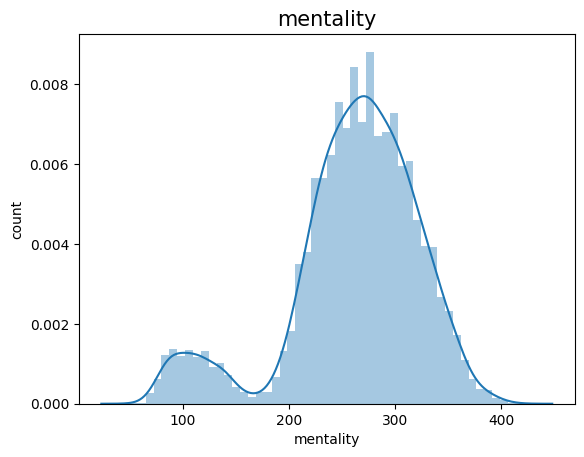

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1164\2094687856.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(visual_df[i])


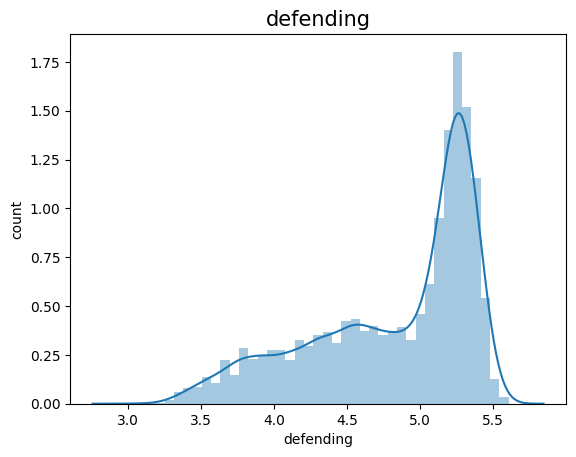

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1164\2094687856.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(visual_df[i])


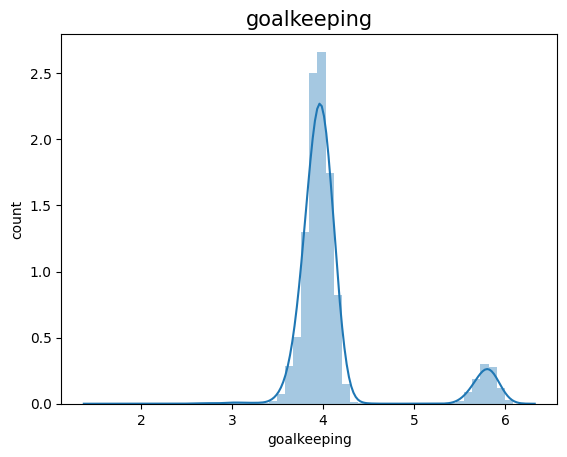

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1164\2094687856.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(visual_df[i])


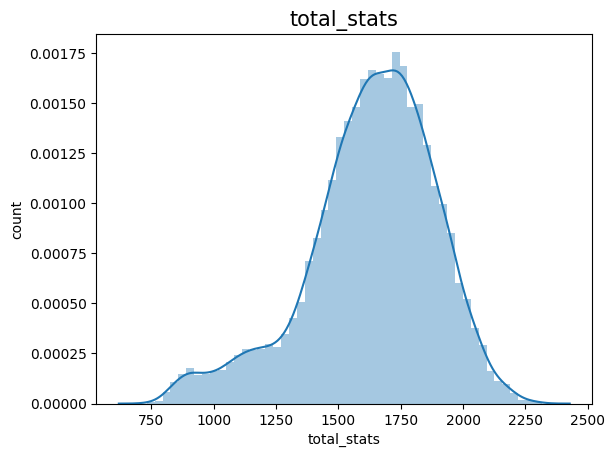

In [56]:
for i in visual_df.columns:
    sns.distplot(visual_df[i])
    plt.xlabel(i)
    plt.ylabel('count')
    plt.title(i, size=15)
    plt.show()

<Axes: >

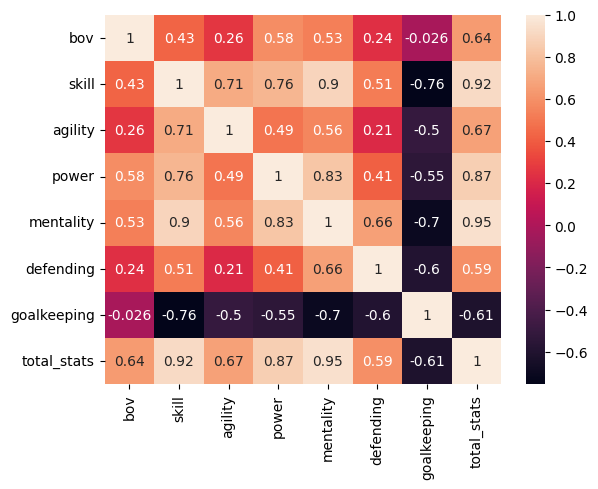

In [57]:
sns.heatmap(visual_df.corr(), annot=True)

In [58]:
#Drop the attacking column bc it as a higher correlation with skill, and a lower correlation with the target than skill
visual_df = visual_df.drop('attacking', axis = 1)

KeyError: "['attacking'] not found in axis"

In [59]:
transformed_df = visual_df
transformed_df['skill']= transformed_df['skill']**(1/2)
transformed_df['defending'] = np.log(transformed_df['defending'])
transformed_df['goalkeeping']= np.log(transformed_df['goalkeeping'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1164\3458749014.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_df[i])


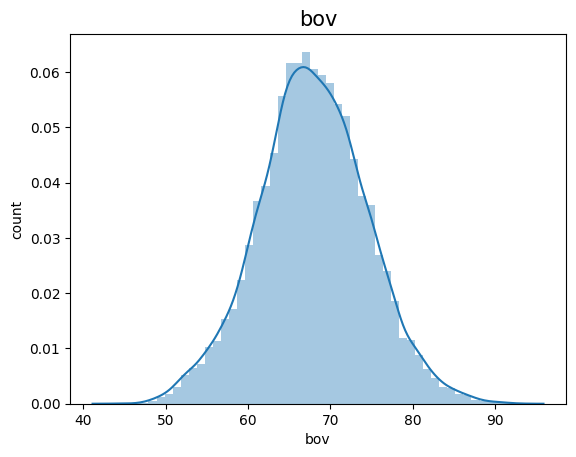

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1164\3458749014.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_df[i])


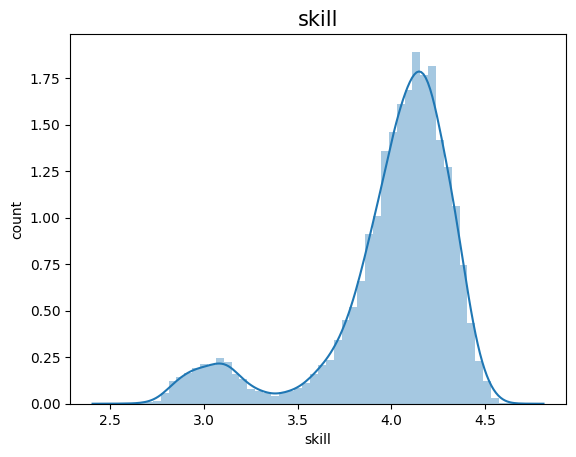

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1164\3458749014.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_df[i])


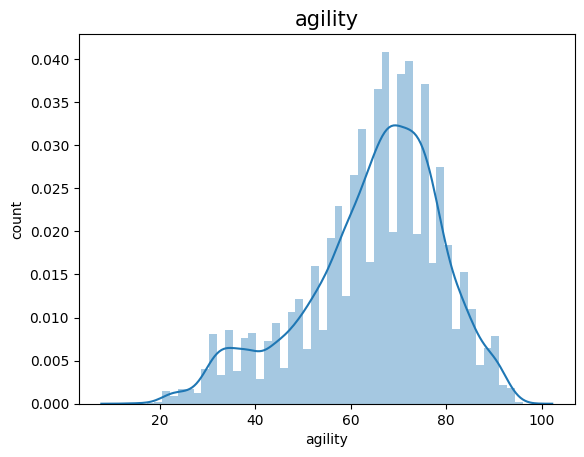

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1164\3458749014.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_df[i])


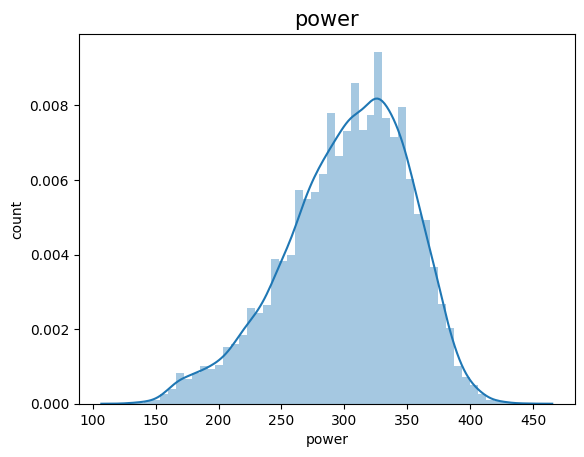

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1164\3458749014.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_df[i])


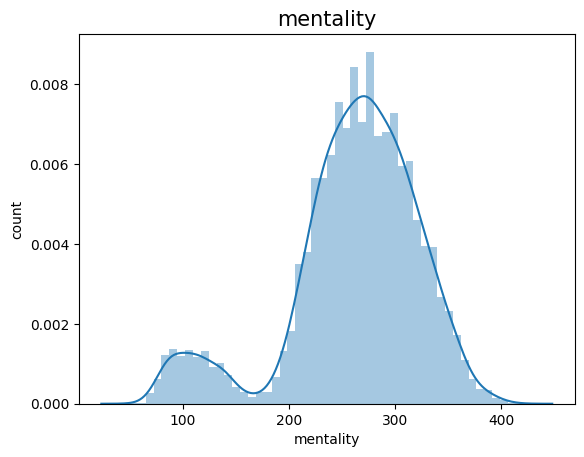

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1164\3458749014.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_df[i])


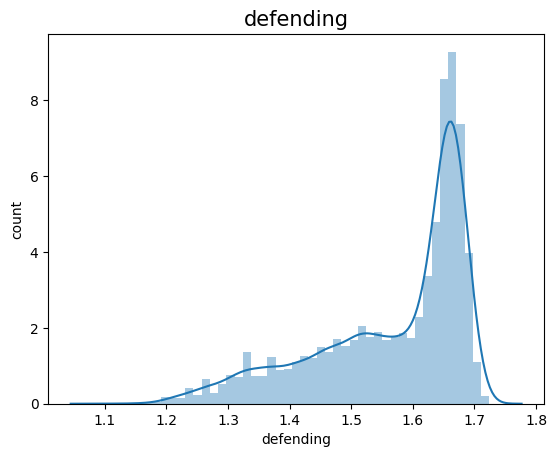

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1164\3458749014.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_df[i])


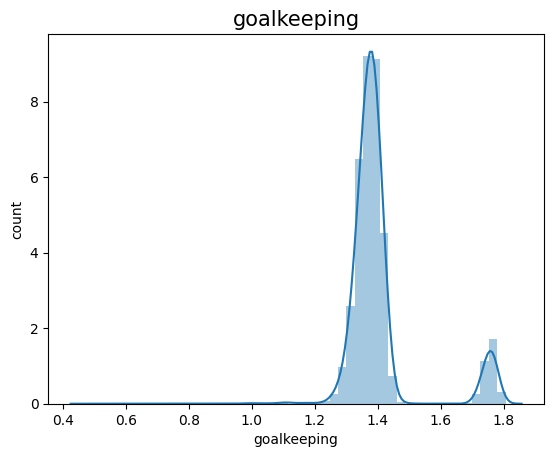

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1164\3458749014.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_df[i])


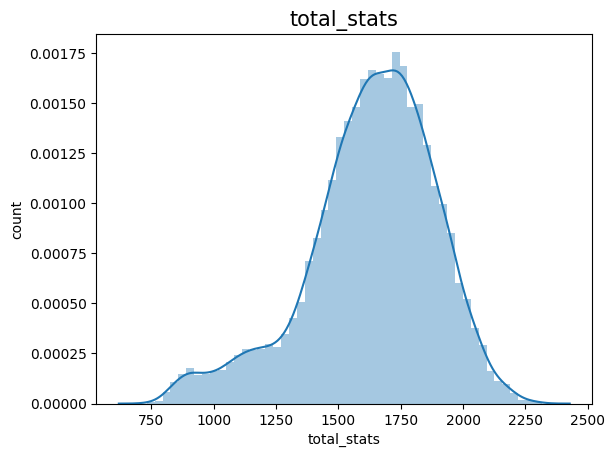

In [60]:
for i in transformed_df.columns:
    sns.distplot(transformed_df[i])
    plt.xlabel(i)
    plt.ylabel('count')
    plt.title(i, size=15)
    plt.show()

In [20]:
categorical = categorical.drop(['position'], axis=1)

In [61]:
categorical['inch_height']=list(map(lambda x: int(x.split('\'')[0])*12+int(x.split('\'')[1].split('"')[0]), categorical['height']))

In [62]:
categorical.columns

Index(['bp', 'position', 'height', 'weight', 'foot', 'w/f', 'sm', 'a/w', 'd/w',
       'ir', 'hits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam',
       'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm',
       'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'inch_height'],
      dtype='object')

In [63]:
categorical = categorical.drop(['height',
       'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb', 'gk'], axis=1)

In [64]:
categorical['weight']= list(map(lambda x: x.replace('lbs', ''), categorical['weight']))
categorical['weight']= pd.to_numeric(categorical['weight'], errors = 'coerce')
categorical['hits']= pd.to_numeric(categorical['hits'], errors = 'coerce')

In [65]:
median = categorical['hits'].dropna()
x = np.median(median)
categorical['hits'] = categorical['hits'].fillna(x)
categorical['w/f']= pd.to_numeric(categorical['w/f'].str.replace(" ★", ""), errors = 'coerce')
categorical['sm']= pd.to_numeric(categorical['sm'].str.replace("★", ""), errors = 'coerce')
categorical['ir']= pd.to_numeric(categorical['ir'].str.replace(" ★", ""), errors = 'coerce')
numericals =categorical[['weight', 'w/f', 'sm', 'ir', 'hits', 'inch_height']]
categorical= categorical.drop(['weight', 'w/f', 'sm', 'ir', 'hits', 'inch_height'], axis=1)
final_df = pd.concat([numericals, transformed_df], axis=1)

In [ ]:
categorical.head()

In [ ]:
sns.heatmap(final_df.corr(), annot = True)

In [67]:
scaled= pd.DataFrame(StandardScaler().fit_transform(final_df.drop('total_stats', axis=1)))

In [68]:
encoded= pd.DataFrame(OneHotEncoder(drop='first').fit_transform(categorical).toarray())
fifa= pd.concat([encoded, scaled], axis=1)

In [30]:
fifa= pd.concat([encoded, scaled], axis=1)

In [31]:
y = final_df['total_stats']
x_train, x_test, y_train, y_test= train_test_split(fifa , y , test_size=.2)
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
lm= linear_model.LinearRegression()
lm.fit(x_train, y_train)
prediction=lm.predict(x_test)

In [32]:
lm= linear_model.LinearRegression()
lm.fit(x_train, y_train)
prediction=lm.predict(x_test)

In [33]:
dt.score(x_test, y_test)

0.967249524868958

In [34]:
lm.score(x_test, y_test)

0.9923780948058228

In [35]:
final_df.columns

Index(['weight', 'w/f', 'sm', 'ir', 'hits', 'inch_height', 'bov', 'skill',
       'agility', 'power', 'mentality', 'defending', 'goalkeeping',
       'total_stats'],
      dtype='object')

In [ ]:
data = pd.read_csv('C:/Users/ASUS/Desktop/Hector/mini_project#1/data_mid_bootcamp_project_FIFA_MoneyBall/fifa21_male2.csv')

data.columns=data.columns.str.lower().str.replace(' ', '_')

data.isna().sum()

#the next columns are not important because they have no relevant data for the Linnear regression
data = data.drop(['name', 'nationality', 'club', 'player_photo', 'club_logo', 
                               'flag_photo', 'team_&_contract', 'joined', 'loan_date_end', 'value', 'wage', 'release_clause',
       'contract', 'gender'], axis = 1)

data = data.dropna()

data['position'] = data['position'].replace('ACB', 'CB')

#There are some players who has more than 3 position at the same time, we remove those players with this filter
data = data[data['position'].str.len() <= 10]

#here we replace the growth with a value of 0, with the mean of the column, this because is not posible for a player
#to have a value of 0 in that column, and if we drop those 0 we will be loosing a lot of data
noceros= data
noceros = noceros[noceros['growth'] > 0]
x = noceros['growth'].mean()
data['growth']= data['growth'].replace(0, x)

data = data.sort_values('position')

data= data.reset_index(drop=True)

In [ ]:
visual_df = df.drop(['position', 'age', 'growth', 'bp'], axis = 1)

categorical= data.select_dtypes(include='object')

#Here we create a plot to see if the data looks like a standart deviation or if we need to transform data
for i in visual_df.columns:
    sns.distplot(visual_df[i])
    plt.xlabel(i)
    plt.ylabel('count')
    plt.title(i, size=15)
    plt.show()
    
#Now we check for the correlation between the features and with the target
sns.heatmap(visual_df.corr(), annot=True)

#Drop the attacking column bc it as a higher correlation with skill, and a lower correlation with the target than skill
visual_df = visual_df.drop('attacking', axis = 1)

#There were some columns that needed to be transformed, they doesn´t look like a standart deviation but it is very close
#also, we do not remove any outlier because they came from different data and that will remove a lot of important data
transformed_df = visual_df
transformed_df['skill']= transformed_df['skill']**(1/2)
transformed_df['defending'] = np.log(transformed_df['defending'])
transformed_df['goalkeeping']= np.log(transformed_df['goalkeeping'])

#Now it looks this way
for i in transformed_df.columns:
    sns.distplot(transformed_df[i])
    plt.xlabel(i)
    plt.ylabel('count')
    plt.title(i, size=15)
    plt.show()

#we drop the position column, it has very ambiguous information, instead we use the bp (best position)
categorical = categorical.drop(['position'], axis=1)

#To use this columns we needed as a numerical
categorical['inch_height']=list(map(lambda x: int(x.split('\'')[0])*12+int(x.split('\'')[1].split('"')[0]), categorical['height']))
categorical['weight']= list(map(lambda x: x.replace('lbs', ''), categorical['weight']))
categorical['weight']= pd.to_numeric(categorical['weight'], errors = 'coerce')
categorical['hits']= pd.to_numeric(categorical['hits'], errors = 'coerce')
median = categorical['hits'].dropna()
np.median(median)
categorical['hits'] = categorical['hits'].fillna(7)
categorical['w/f']= pd.to_numeric(categorical['w/f'].str.replace(" ★", ""), errors = 'coerce')
categorical['sm']= pd.to_numeric(categorical['sm'].str.replace("★", ""), errors = 'coerce')
categorical['ir']= pd.to_numeric(categorical['ir'].str.replace(" ★", ""), errors = 'coerce')
numericals =categorical[['weight', 'w/f', 'sm', 'ir', 'hits', 'inch_height']]
categorical= categorical.drop(['weight', 'w/f', 'sm', 'ir', 'hits', 'inch_height'], axis=1)

#this are information is usseles fro the target
categorical = categorical.drop(['height',
       'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb', 'gk'], axis=1)

#This would be the dinal data that we would use for the module
final_df = pd.concat([numericals, transformed_df], axis=1)

scaled= pd.DataFrame(StandardScaler().fit_transform(final_df.drop('total_stats', axis=1)))
encoded= pd.DataFrame(OneHotEncoder(drop='first').fit_transform(categorical).toarray())
fifa= pd.concat([encoded, scaled], axis=1)

In [ ]:
y = final_df['total_stats']
x_train, x_test, y_train, y_test= train_test_split(fifa , y , test_size=.2)
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
lm= linear_model.LinearRegression()
lm.fit(x_train, y_train)
prediction=lm.predict(x_test)

print(dt.score(x_test, y_test), lm.score(x_test, y_test))